In [1]:
import pyforest as pf
from sklearn import model_selection
from lazypredict.Supervised import LazyClassifier

C:\Users\sys\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [2]:
data = pd.read_csv("E:\\Deployement\\heart.csv")

<IPython.core.display.Javascript object>

In [3]:
data.head()

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.00,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.00,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.00,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.50,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.00,Up,0


In [4]:
data.shape

(918, 12)

# Attribute Information

Age:           age of the patient [years]

Sex:           sex of the patient [M: Male, F: Female]

ChestPainType: chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

RestingBP:     resting blood pressure [mm Hg]

Cholesterol:   serum cholesterol [mm/dl]

FastingBS:     fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

RestingECG:    resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST 

elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

MaxHR:         maximum heart rate achieved [Numeric value between 60 and 202]

ExerciseAngina: exercise-induced angina [Y: Yes, N: No]

Oldpeak: oldpeak = ST [Numeric value measured in depression]

ST_Slope:     the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

HeartDisease: output class [1: heart disease, 0: Normal]

# Data collection - Secondary collection method

In [5]:
"""This dataset was created by combining different datasets already available independently but not combined before.
In this dataset, 5 heart datasets are combined over 11 common features which makes it the largest heart disease dataset 
available so far for research purposes. The five datasets used for its curation are:

Cleveland: 303 observations
Hungarian: 294 observations
Switzerland: 123 observations
Long Beach VA: 200 observations
Stalog (Heart) Data Set: 270 observations
Total: 1190 observations
Duplicated: 272 observations

Final dataset: 918 observations"""

"""Acknowledgements
Creators:

Hungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.
University Hospital, Zurich, Switzerland: William Steinbrunn, M.D.
University Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.
V.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D."""

'Acknowledgements\nCreators:\n\nHungarian Institute of Cardiology. Budapest: Andras Janosi, M.D.\nUniversity Hospital, Zurich, Switzerland: William Steinbrunn, M.D.\nUniversity Hospital, Basel, Switzerland: Matthias Pfisterer, M.D.\nV.A. Medical Center, Long Beach and Cleveland Clinic Foundation: Robert Detrano, M.D., Ph.D.'

# Data preprocessing

In [6]:
# Dealing with missing values
data.isnull().sum()   # the data has no missing values

Age               0
Sex               0
ChestPainType     0
RestingBP         0
Cholesterol       0
FastingBS         0
RestingECG        0
MaxHR             0
ExerciseAngina    0
Oldpeak           0
ST_Slope          0
HeartDisease      0
dtype: int64

<IPython.core.display.Javascript object>

AxesSubplot(0.125,0.125;0.775x0.755)


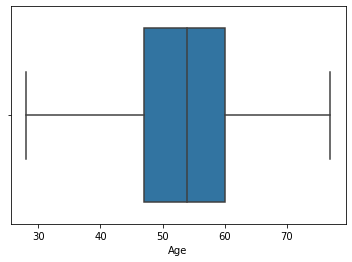

In [7]:
# Dealing with outliers = Age,RestingBP,Cholesterol,MaxHR are numeric attributes
print(sns.boxplot(data['Age']))

In [8]:
data['Cholesterol'] = np.where(data['Cholesterol']>350,data['Cholesterol'].mean(),data['Cholesterol'])
data['Cholesterol'] = np.where(data['Cholesterol']<100,data['Cholesterol'].mean(),data['Cholesterol'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AxesSubplot(0.125,0.125;0.775x0.755)


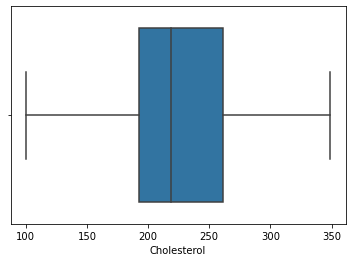

In [9]:
print(sns.boxplot(data['Cholesterol']))

In [10]:
data['MaxHR'] = np.where(data['MaxHR']<70,data['MaxHR'].mean(),data['MaxHR'])

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AxesSubplot(0.125,0.125;0.775x0.755)


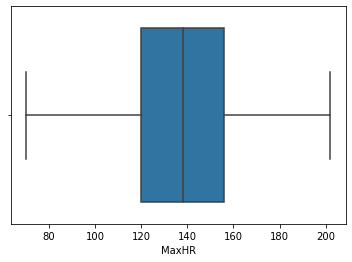

In [11]:
print(sns.boxplot(data['MaxHR']))

In [12]:
data['RestingBP'] = np.where(data['RestingBP']>170,data['RestingBP'].mean(),data['RestingBP'])
data['RestingBP'] = np.where(data['RestingBP']<90,data['RestingBP'].mean(),data['RestingBP'])


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

AxesSubplot(0.125,0.125;0.775x0.755)


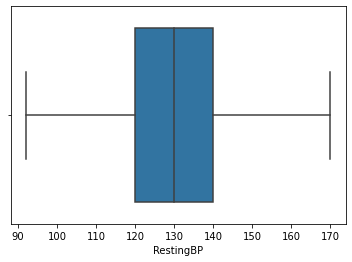

In [13]:
print(sns.boxplot(data['RestingBP']))

In [14]:
x = data.iloc[:,:-1]
y = data.iloc[:,-1]

In [15]:
print(x.shape)
print(y.shape)

(918, 11)
(918,)


In [16]:
# checking whether dataset is balanced or not
y.value_counts()  

1    508
0    410
Name: HeartDisease, dtype: int64

# One-Hot encoding

In [17]:
x.head(2)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope
0,40,M,ATA,140.00,289.00,0,Normal,172.00,N,0.00,Up
1,49,F,NAP,160.00,180.00,0,Normal,156.00,N,1.00,Flat


In [18]:
x['Sex'].replace({'M':1,'F':0},inplace=True)
x['ExerciseAngina'].replace({"N":0,"Y":1},inplace = True)

In [19]:
x = pd.get_dummies(x,columns = ['ChestPainType','RestingECG','ST_Slope'])

<IPython.core.display.Javascript object>

In [20]:
x.shape

(918, 18)

In [21]:
names = x.columns

# Feature Scaling

In [22]:
x = sklearn.preprocessing.minmax_scale(x,feature_range=(0,1))

<IPython.core.display.Javascript object>

In [23]:
x =pd.DataFrame(x,columns=names)

<IPython.core.display.Javascript object>

In [24]:
x.head(3)

,Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up
0,0.24,1.00,0.62,0.76,0.00,0.77,0.00,0.30,0.00,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
1,0.43,0.00,0.87,0.32,0.00,0.65,0.00,0.41,0.00,0.00,1.00,0.00,0.00,1.00,0.00,0.00,1.00,0.00
2,0.18,1.00,0.49,0.73,0.00,0.21,0.00,0.30,0.00,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00


# Identifying the best classification model

In [25]:
x_train,x_test,y_train,y_test = model_selection.train_test_split(x,y,test_size = 0.2,random_state = 123)

In [26]:
XGBoost = xgb.XGBClassifier()
Rand_forest = sklearn.ensemble.RandomForestClassifier()
svm = sklearn.svm.SVC()
Dtree = sklearn.tree.DecisionTreeClassifier()
GBM = sklearn.ensemble.GradientBoostingClassifier()
log = sklearn.linear_model.LogisticRegression()

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [27]:
XGBoost.fit(x_train,y_train)
Rand_forest.fit(x_train,y_train)
svm.fit(x_train,y_train)
Dtree.fit(x_train,y_train)
GBM.fit(x_train,y_train)
log.fit(x_train,y_train)

LogisticRegression()

In [28]:
p1 = XGBoost.predict(x_train)
p2 = Rand_forest.predict(x_train)
p3 = svm.predict(x_train)
p4 = Dtree.predict(x_train)
p5 = GBM.predict(x_train)
p6 = log.predict(x_train)

In [29]:
print("xgboost:",metrics.accuracy_score(y_train,p1))
print("Rand_forest:",metrics.accuracy_score(y_train,p2))
print("svm:",metrics.accuracy_score(y_train,p3))
print("Dtree:",metrics.accuracy_score(y_train,p4))
print("GBM:",metrics.accuracy_score(y_train,p5))
print("log:",metrics.accuracy_score(y_train,p6))

<IPython.core.display.Javascript object>

xgboost: 1.0


<IPython.core.display.Javascript object>

Rand_forest: 1.0


<IPython.core.display.Javascript object>

svm: 0.8923705722070845


<IPython.core.display.Javascript object>

Dtree: 1.0


<IPython.core.display.Javascript object>

GBM: 0.9495912806539509


<IPython.core.display.Javascript object>

log: 0.8692098092643051


out all classifiers xgb,randomforest and Dtree are leading to specific prediction and svm,logistic and GBM are good,picking GBM which is optimum

# Identifying the Best parameters combination using Gridsearchcv

In [30]:
GBM

GradientBoostingClassifier()

In [31]:
parameters = {
              "loss":["deviance","exponential"],
              "max_features":["log2","sqrt"],
              'learning_rate': [0.1,0.25,0.5,0.75,1.0],
              'n_estimators': [5,10,15,20,25]}


In [32]:
Grid_search = sklearn.model_selection.GridSearchCV(estimator=GBM,param_grid=parameters,cv=10)

<IPython.core.display.Javascript object>

In [33]:
Grid_search.fit(x_train,y_train)

GridSearchCV(cv=10, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.1, 0.25, 0.5, 0.75, 1.0],
                         'loss': ['deviance', 'exponential'],
                         'max_features': ['log2', 'sqrt'],
                         'n_estimators': [5, 10, 15, 20, 25]})

In [34]:
Grid_search.best_params_  # best combination,which gives better accuracy

{'learning_rate': 0.25,
 'loss': 'exponential',
 'max_features': 'log2',
 'n_estimators': 20}

In [35]:
gd = Grid_search.predict(x_train)

In [36]:
metrics.accuracy_score(gd,y_train) # training accuracy of the model

<IPython.core.display.Javascript object>

0.9019073569482289

# Parameter-Tuned Model 

In [37]:
# Model building and fitting the data
Model = sklearn.ensemble.GradientBoostingClassifier(learning_rate=0.25,loss='exponential',max_features='sqrt',n_estimators=25)
Model.fit(x_train,y_train)
y_tp= Model.predict(x_train)
sklearn.metrics.accuracy_score(y_train,y_tp)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

0.9128065395095368

In [38]:
# predicting with test data
y_pred = Model.predict(x_test)
sklearn.metrics.accuracy_score(y_test,y_pred)

<IPython.core.display.Javascript object>

0.8695652173913043

# Model Perfomance metrics

# confusion matrix ,classification report,precession,recall and f1score

In [39]:
conf_matrix = sklearn.metrics.confusion_matrix(y_test,y_pred)

conf_matrix

<IPython.core.display.Javascript object>

array([[64, 17],
       [ 7, 96]], dtype=int64)

In [40]:
Accuracy  = metrics.accuracy_score(y_test,y_pred)
Precesion = metrics.precision_score(y_test,y_pred)
Recall = metrics.recall_score(y_test,y_pred)
F1_score = metrics.f1_score(y_test,y_pred)

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [41]:
print(conf_matrix)
print("Accuracy:",Accuracy)
print("Precesion:",Precesion)
print("Recall:",Recall)
print("F1-score:",F1_score)

[[64 17]
 [ 7 96]]
Accuracy: 0.8695652173913043
Precesion: 0.8495575221238938
Recall: 0.9320388349514563
F1-score: 0.888888888888889


# ROC and AUC

In [42]:
metrics.roc_auc_score(y_test,y_pred)

<IPython.core.display.Javascript object>

0.8610811458707899

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

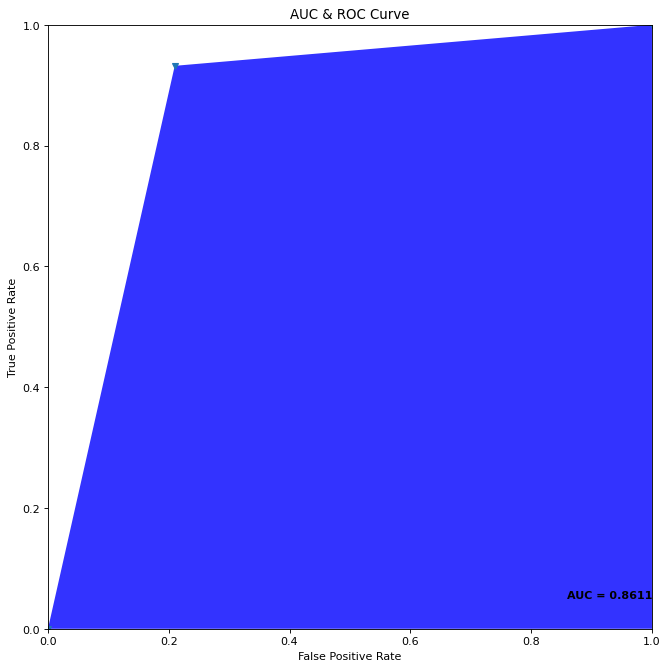

In [43]:
auc = metrics.roc_auc_score(y_test, y_pred)

fpr, tpr, thresolds = metrics.roc_curve(y_test, y_pred)

plt.figure(figsize=(12, 10), dpi=80)
plt.axis('scaled')
plt.xlim([0, 1])
plt.ylim([0, 1])
plt.title("AUC & ROC Curve")
plt.plot(fpr, tpr, 'v')
plt.fill_between(fpr, tpr, facecolor='blue', alpha=0.8)
plt.text(1, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=10, weight='bold', color='black')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [49]:
x_test.to_csv(index=True)

',Age,Sex,RestingBP,Cholesterol,FastingBS,MaxHR,ExerciseAngina,Oldpeak,ChestPainType_ASY,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_LVH,RestingECG_Normal,RestingECG_ST,ST_Slope_Down,ST_Slope_Flat,ST_Slope_Up\r\n349,0.16326530612244894,1.0,0.23076923076923062,0.37043856574574624,1.0,0.41666666666666674,1.0,0.4090909090909091,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0\r\n653,0.2857142857142857,1.0,0.487179487179487,0.32128514056224894,0.0,0.6060606060606062,0.0,0.29545454545454547,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0\r\n7,0.5306122448979591,1.0,0.23076923076923062,0.43373493975903615,0.0,0.5454545454545454,0.0,0.29545454545454547,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0\r\n571,0.8367346938775508,1.0,0.6153846153846152,0.040160642570281124,1.0,0.2954545454545455,1.0,0.46590909090909094,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0\r\n171,0.2448979591836734,1.0,0.6153846153846152,0.5421686746987953,0.0,0.893939393939394,0.0,0.29545454545454547,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,

In [48]:
y_test.to_csv(sep = ',',index=True)

',HeartDisease\r\n349,1\r\n653,0\r\n7,0\r\n571,1\r\n171,0\r\n177,0\r\n546,1\r\n134,0\r\n887,1\r\n580,1\r\n531,1\r\n726,0\r\n195,0\r\n384,1\r\n805,0\r\n306,1\r\n910,0\r\n739,0\r\n267,0\r\n335,1\r\n85,1\r\n172,0\r\n676,1\r\n145,0\r\n369,1\r\n669,0\r\n675,0\r\n885,0\r\n532,1\r\n164,0\r\n138,1\r\n565,1\r\n838,1\r\n753,0\r\n204,0\r\n397,1\r\n270,0\r\n329,1\r\n699,0\r\n719,1\r\n859,0\r\n853,0\r\n399,1\r\n185,1\r\n584,1\r\n469,0\r\n167,0\r\n5,0\r\n200,0\r\n239,1\r\n246,1\r\n291,0\r\n41,1\r\n662,1\r\n300,1\r\n317,1\r\n344,1\r\n188,0\r\n196,0\r\n845,1\r\n303,1\r\n210,1\r\n578,1\r\n741,1\r\n558,1\r\n511,1\r\n684,1\r\n912,1\r\n279,0\r\n48,0\r\n556,0\r\n716,1\r\n712,1\r\n374,1\r\n586,1\r\n221,1\r\n35,0\r\n348,1\r\n694,0\r\n819,1\r\n229,0\r\n406,1\r\n4,0\r\n310,0\r\n734,1\r\n871,0\r\n783,0\r\n307,0\r\n498,1\r\n50,1\r\n184,0\r\n814,1\r\n602,1\r\n560,0\r\n370,1\r\n261,0\r\n162,0\r\n521,1\r\n203,0\r\n57,1\r\n252,0\r\n478,1\r\n659,1\r\n482,1\r\n614,1\r\n643,1\r\n644,0\r\n55,0\r\n249,1\r\n316,1\r\n619,0